In [8]:
import gensim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import word2vec
import nltk,re
from tqdm import tqdm

In [10]:
data=pd.read_csv('/content/Reviews_new ( 0-1).csv')
print(data.head())

   Id   ProductId          UserId     ProfileName  HelpfulnessNumerator  \
0   2  B00813GRG4  A1D87F6ZCVE5NK          dll pa                   0.0   
1   4  B000UA0QIQ  A395BORC6FGVXV            Karl                   3.0   
2  13  B0009XLVG0   A327PCT23YH90              LT                   1.0   
3  17  B001GVISJM  A3KLWF6WQ5BNYO  Erica Neathery                   0.0   
4  27  B001GVISJM  A3RXAU2N8KV45G          lady21                   0.0   

   HelpfulnessDenominator  Score          Time  \
0                     0.0    0.0  1.346976e+09   
1                     3.0    0.0  1.307923e+09   
2                     1.0    0.0  1.339546e+09   
3                     0.0    0.0  1.348099e+09   
4                     1.0    0.0  1.332634e+09   

                                Summary  \
0                     Not as Advertised   
1                        Cough Medicine   
2  My Cats Are Not Fans of the New Food   
3                            poor taste   
4                       Nasty No 

In [11]:
data=data.drop(['Id','ProductId','UserId','ProfileName','HelpfulnessNumerator','HelpfulnessDenominator','Time','Summary'], axis=1, inplace=False)
print(data.head())

   Score                                               Text
0    0.0  Product arrived labeled as Jumbo Salted Peanut...
1    0.0  If you are looking for the secret ingredient i...
2    0.0  My cats have been happily eating Felidae Plati...
3    0.0  I love eating them and they are good for watch...
4    0.0  The candy is just red , No flavor . Just  plan...


In [12]:
data.isnull().sum()

,0
Score,1
Text,1


In [13]:
data.shape

(85114, 2)

In [14]:
data=data.dropna(axis=0)

In [15]:
data.isnull().sum()

,0
Score,0
Text,0


In [16]:
data.shape

(85113, 2)

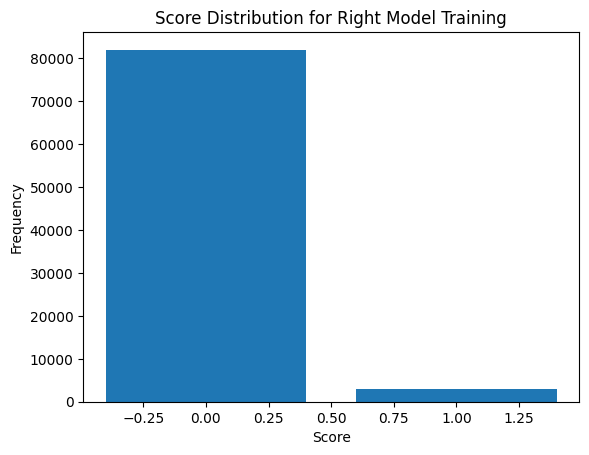

In [17]:
score_counts = data['Score'].value_counts()

plt.bar(score_counts.index, score_counts.values)

plt.title('Score Distribution for Right Model Training')
plt.xlabel('Score')
plt.ylabel('Frequency')


plt.show()


In [18]:
#data2 = data.sample(n=500, random_state=564).reset_index(drop=True)
#print(data2.shape)

In [19]:
# score_counts = data2['Score'].value_counts()

# plt.bar(score_counts.index, score_counts.values)

# plt.title('Score Distribution for Right Model Training')
# plt.xlabel('Score')
# plt.ylabel('Frequency')


# plt.show()


In [20]:
from nltk.stem import WordNetLemmatizer
lm=WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [21]:
print(data.head())

   Score                                               Text
0    0.0  Product arrived labeled as Jumbo Salted Peanut...
1    0.0  If you are looking for the secret ingredient i...
2    0.0  My cats have been happily eating Felidae Plati...
3    0.0  I love eating them and they are good for watch...
4    0.0  The candy is just red , No flavor . Just  plan...


In [22]:
corpus =[]
for i in tqdm(range(0,len(data))):
  review = re.sub('[^a-zA-Z]', ' ',data['Text'][i])
  review = review.lower()
  review = review.split()

  review = [lm.lemmatize(word) for word in review]
  review = ' '.join(review)
  corpus.append(review)

[[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus, data['Text']) if i<1]


100%|██████████| 85113/85113 [00:52<00:00, 1634.90it/s]


[]

In [23]:
corpus

['product arrived labeled a jumbo salted peanut the peanut were actually small sized unsalted not sure if this wa an error or if the vendor intended to represent the product a jumbo',
 'if you are looking for the secret ingredient in robitussin i believe i have found it i got this in addition to the root beer extract i ordered which wa good and made some cherry soda the flavor is very medicinal',
 'my cat have been happily eating felidae platinum for more than two year i just got a new bag and the shape of the food is different they tried the new food when i first put it in their bowl and now the bowl sit full and the kitty will not touch the food i ve noticed similar review related to formula change in the past unfortunately i now need to find a new food that my cat will eat',
 'i love eating them and they are good for watching tv and looking at movie it is not too sweet i like to transfer them to a zip lock baggie so they stay fresh so i can take my time eating them',
 'the candy is 

In [24]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [25]:
words = []
for sent in tqdm(corpus):
  sent_token=sent_tokenize(sent)
  for sent in sent_token:
    words.append(simple_preprocess(sent))

100%|██████████| 85113/85113 [00:09<00:00, 8516.42it/s]


In [26]:
model = gensim.models.Word2Vec(words)

In [27]:
model.corpus_count

85113

In [28]:
model.epochs

5

In [29]:
model.wv.similar_by_word('good')

[('great', 0.7954294681549072),
 ('decent', 0.6746936440467834),
 ('bad', 0.6730168461799622),
 ('fantastic', 0.6566901206970215),
 ('tasty', 0.6439919471740723),
 ('ok', 0.6346919536590576),
 ('pleasant', 0.6218565702438354),
 ('delicious', 0.5878437757492065),
 ('nice', 0.5829324722290039),
 ('okay', 0.576754093170166)]

In [30]:
def avg_word2vec(doc):
  return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [31]:
x=[]
for i in tqdm(range(len(words))):
  try:
    x.append(avg_word2vec(words[i]))
  except RuntimeError:
    print("Empty value at",i)


100%|██████████| 85113/85113 [02:51<00:00, 496.24it/s]


In [32]:
len(x)

85113

In [34]:
x[187996]

IndexError: list index out of range

In [35]:


# Filter out invalid entries (e.g., NaN or None)
x_cleaned = [vec for vec in x if vec is not None and not np.isnan(vec).any()]

print(f"Original length: {len(x)}, Cleaned length: {len(x_cleaned)}")


Original length: 85113, Cleaned length: 85113


In [36]:
x=x_cleaned

In [37]:
#x = np.delete(x,188001 )
print(len(x))

85113


In [38]:
y=data['Score']
print(y.head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Score, dtype: float64


In [39]:
data2 = []
for i in tqdm(range(0, len(x))):
    data2.append(x[i].reshape(1, -1))


df = pd.DataFrame(np.vstack(data2))


100%|██████████| 85113/85113 [00:00<00:00, 893144.35it/s]


In [40]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.021764,0.627362,-0.124267,-0.134637,0.481551,-0.113179,0.005097,-0.124020,0.070741,0.181760,...,0.295989,0.149262,0.734991,-0.048673,0.046482,-0.458000,0.001161,0.047459,-0.468331,-0.174157
1,-0.055148,0.455837,0.479555,0.016780,-0.532870,-0.545283,0.457468,-0.474547,0.612917,0.449376,...,0.240227,-0.364871,0.702760,0.098458,-0.225699,0.429614,-0.252763,-0.092983,0.262343,-0.116374
2,-0.382801,0.736770,-0.113886,-0.229216,-0.293731,-0.091330,0.304878,0.187770,0.322322,-0.204775,...,0.009905,-0.284170,0.599702,-0.098819,-0.239884,-0.173517,-0.357961,-0.061946,-0.138134,0.007908
3,-0.485985,0.791153,-0.293308,0.065463,-0.440869,-0.160164,-0.194900,0.082499,0.679941,0.220660,...,-0.135065,0.012016,0.489067,-0.301516,-0.578850,-0.235834,0.431674,0.287436,0.644099,-0.100064
4,-0.293769,0.876703,-1.059570,0.370984,0.005596,-0.079276,-0.291085,0.196196,0.368528,0.353888,...,0.386382,0.235662,0.810351,0.004268,-0.866289,-0.355452,0.216369,0.721730,0.778076,-0.297209


In [41]:
df['output']=y

In [42]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,output
0,-0.021764,0.627362,-0.124267,-0.134637,0.481551,-0.113179,0.005097,-0.124020,0.070741,0.181760,...,0.149262,0.734991,-0.048673,0.046482,-0.458000,0.001161,0.047459,-0.468331,-0.174157,0.0
1,-0.055148,0.455837,0.479555,0.016780,-0.532870,-0.545283,0.457468,-0.474547,0.612917,0.449376,...,-0.364871,0.702760,0.098458,-0.225699,0.429614,-0.252763,-0.092983,0.262343,-0.116374,0.0
2,-0.382801,0.736770,-0.113886,-0.229216,-0.293731,-0.091330,0.304878,0.187770,0.322322,-0.204775,...,-0.284170,0.599702,-0.098819,-0.239884,-0.173517,-0.357961,-0.061946,-0.138134,0.007908,0.0
3,-0.485985,0.791153,-0.293308,0.065463,-0.440869,-0.160164,-0.194900,0.082499,0.679941,0.220660,...,0.012016,0.489067,-0.301516,-0.578850,-0.235834,0.431674,0.287436,0.644099,-0.100064,0.0
4,-0.293769,0.876703,-1.059570,0.370984,0.005596,-0.079276,-0.291085,0.196196,0.368528,0.353888,...,0.235662,0.810351,0.004268,-0.866289,-0.355452,0.216369,0.721730,0.778076,-0.297209,0.0


In [43]:
df.dropna(inplace=True)

In [44]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
96,0
97,0
98,0
99,0


In [45]:
x=df.drop('output',axis=1)
y=df['output']

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

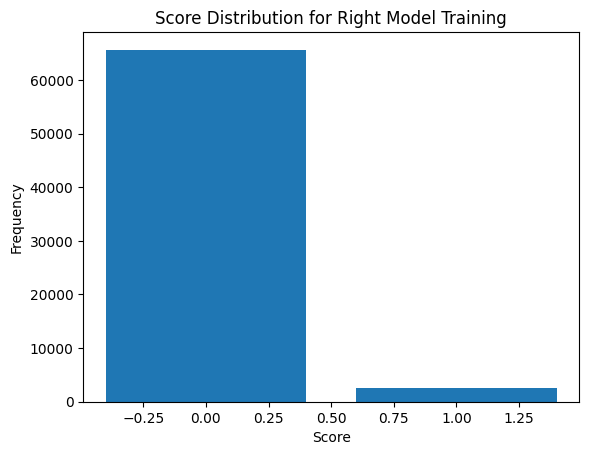

In [47]:
score_counts = y_train.value_counts()

plt.bar(score_counts.index, score_counts.values)

plt.title('Score Distribution for Right Model Training')
plt.xlabel('Score')
plt.ylabel('Frequency')


plt.show()


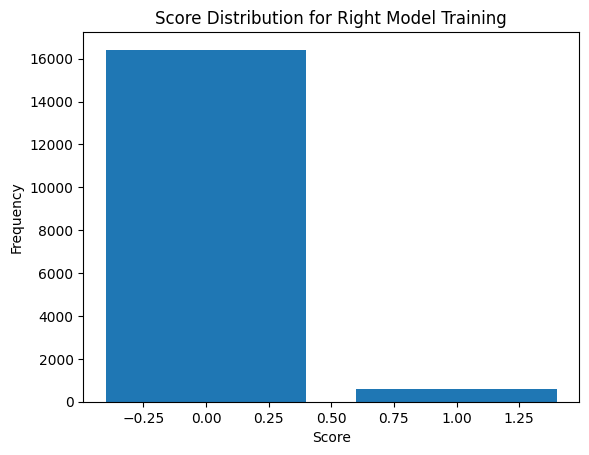

In [48]:
score_counts = y_test.value_counts()

plt.bar(score_counts.index, score_counts.values)

plt.title('Score Distribution for Right Model Training')
plt.xlabel('Score')
plt.ylabel('Frequency')


plt.show()

In [49]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators =5,random_state=18)
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.964753568701169
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     16415
         1.0       0.53      0.11      0.18       608

    accuracy                           0.96     17023
   macro avg       0.75      0.55      0.58     17023
weighted avg       0.95      0.96      0.95     17023



In [51]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

In [52]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9645773365446748
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     16415
         1.0       0.53      0.08      0.14       608

    accuracy                           0.96     17023
   macro avg       0.75      0.54      0.56     17023
weighted avg       0.95      0.96      0.95     17023



In [53]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=100)
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9418433883569288
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97     16415
         1.0       0.23      0.27      0.25       608

    accuracy                           0.94     17023
   macro avg       0.60      0.62      0.61     17023
weighted avg       0.95      0.94      0.94     17023



In [55]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
y_pred = XGB.predict(x_test)


In [56]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.969335604770017
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     16415
         1.0       0.78      0.20      0.31       608

    accuracy                           0.97     17023
   macro avg       0.88      0.60      0.65     17023
weighted avg       0.96      0.97      0.96     17023



In [57]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [58]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9686894201962052
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     16415
         1.0       0.72      0.20      0.31       608

    accuracy                           0.97     17023
   macro avg       0.85      0.60      0.65     17023
weighted avg       0.96      0.97      0.96     17023



In [69]:
test= 'my friend is very bad'

In [70]:
words2 = []

# Tokenize the text into sentences
sent_token = sent_tokenize(test)

# Process each sentence
for sent in tqdm(sent_token):
    words2.append(simple_preprocess(sent))

print(words2)

100%|██████████| 1/1 [00:00<00:00, 5570.12it/s]

[['my', 'friend', 'is', 'very', 'bad']]


In [71]:
words2

[['my', 'friend', 'is', 'very', 'bad']]

In [72]:
x2 = []
for i in tqdm(range(len(words2))):
    if not words2[i]:  # Check if the input is empty
        print(f"Empty value at {i}")
        continue
    x2.append(avg_word2vec(words2[i]))


  0%|          | 0/1 [00:00<?, ?it/s]


AttributeError: 'MLPClassifier' object has no attribute 'wv'

In [63]:
y_pred2=XGB.predict(x2)

XGBoostError: [11:38:53] /workspace/src/predictor/cpu_predictor.cc:789: Check failed: m->NumColumns() == model.learner_model_param->num_feature (1 vs. 100) : Number of columns in data must equal to trained model.
Stack trace:
  [bt] (0) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x22dcbc) [0x7a46c642dcbc]
  [bt] (1) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x72fdc3) [0x7a46c692fdc3]
  [bt] (2) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x731b8d) [0x7a46c6931b8d]
  [bt] (3) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x57c708) [0x7a46c677c708]
  [bt] (4) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x5d0389) [0x7a46c67d0389]
  [bt] (5) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(+0x13c2bc) [0x7a46c633c2bc]
  [bt] (6) /usr/local/lib/python3.10/dist-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromDense+0x10b) [0x7a46c633c7eb]
  [bt] (7) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7a4768d88e2e]
  [bt] (8) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7a4768d85493]



In [68]:
print(y_pred2)

NameError: name 'y_pred2' is not defined